## Project Earthquake

### Group Members: Karthika Pai, Kathryn Chiang, An Qi Ma, Natalie Marcom

For our final STA 141B exploratory data science project, we have decided to focus on earthquakes. Though all four of us use significant datasets and analyze them in different ways, the crux of our datasets are from the [USGS Earthquake Database](https://earthquake.usgs.gov/earthquakes/feed/v1.0/csv.php). With the skills we have learned from this class - most specifically, csv file reading; using libraries such as Basemap, Pandas, Numpy, Matplotlib and basic statistics, we hope to answer several questions we have about earthquakes. Each section will be preceded by the question it tries to answer, in bold.

In [209]:
import warnings
warnings.filterwarnings('ignore')

#import statements
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

import os

from mpl_toolkits.basemap import Basemap
%matplotlib inline

## Let's look at our dataset!

The dataset is a csv file that has been downloaded from the USGS Earthquake Database (shown above). This dataset represents significant earthquakes that have occured throughout the world from the years 1965 to 2016. A significant earthquake is one that has been determined by the USGS to meet the three following criteria:

1. mag_significance = magnitude * 100 * (magnitude / 6.5); 
2. pager_significance = (red) ? 2000 : (orange) ? 1000 : (yellow) ? 500 : 0; (PAGER is a USGS-internal measure)
3. dyfi_significance = min(num_responses, 1000) * max_cdi / 10; (Did you feel it - also known as dyfi - is a query that takes into account whether people perceived the earthquake or not. The higher the magnitude of the earthquake, the greater the dyfi significance)

significance = max(mag_significance, pager_significance) + dyfi_significance

Any event with a significance > 600 is considered a significant event and appears on the list.

In [2]:
directory = os.path.join(".", "world_eq.csv") 
eq = pd.read_csv(directory)

In [165]:
eq.head() #23412 total
total = len(eq)

In [4]:
eq.dtypes

Date                           object
Time                           object
Latitude                      float64
Longitude                     float64
Type                           object
Depth                         float64
Depth Error                   float64
Depth Seismic Stations        float64
Magnitude                     float64
Magnitude Type                 object
Magnitude Error               float64
Magnitude Seismic Stations    float64
Azimuthal Gap                 float64
Horizontal Distance           float64
Horizontal Error              float64
Root Mean Square              float64
ID                             object
Source                         object
Location Source                object
Magnitude Source               object
Status                         object
dtype: object

This is certainly a large dataset! The file has records of over 23000 earthquakes (23000+ rows), the majority of whose magnitude is over 4.0 (precise statistics will be discussed later). It also has 21 features, such as latitude and longitude, the magnitude, depth and other features such as azimuthal gap and USGS-specific earthquake ID.

We don't need some features for our analysis, so let's include only the time, the data, the latitude and longitude, and the depth of the earthquake source to make our analysis simpler!

In [5]:
simple = eq[["Date", "Time", "Latitude","Longitude","Magnitude", "Depth"]]

In [6]:
simple.head()

,Date,Time,Latitude,Longitude,Magnitude,Depth
0,01/02/1965,13:44:18,19.246,145.616,6.0,131.6
1,01/04/1965,11:29:49,1.863,127.352,5.8,80.0
2,01/05/1965,18:05:58,-20.579,-173.972,6.2,20.0
3,01/08/1965,18:49:43,-59.076,-23.557,5.8,15.0
4,01/09/1965,13:32:50,11.938,126.427,5.8,15.0


## What is a rough geographical distribution of our earthquake list? Are some areas more "cluttered" or concentrated than others?

In [7]:
m = Basemap(projection="mill")

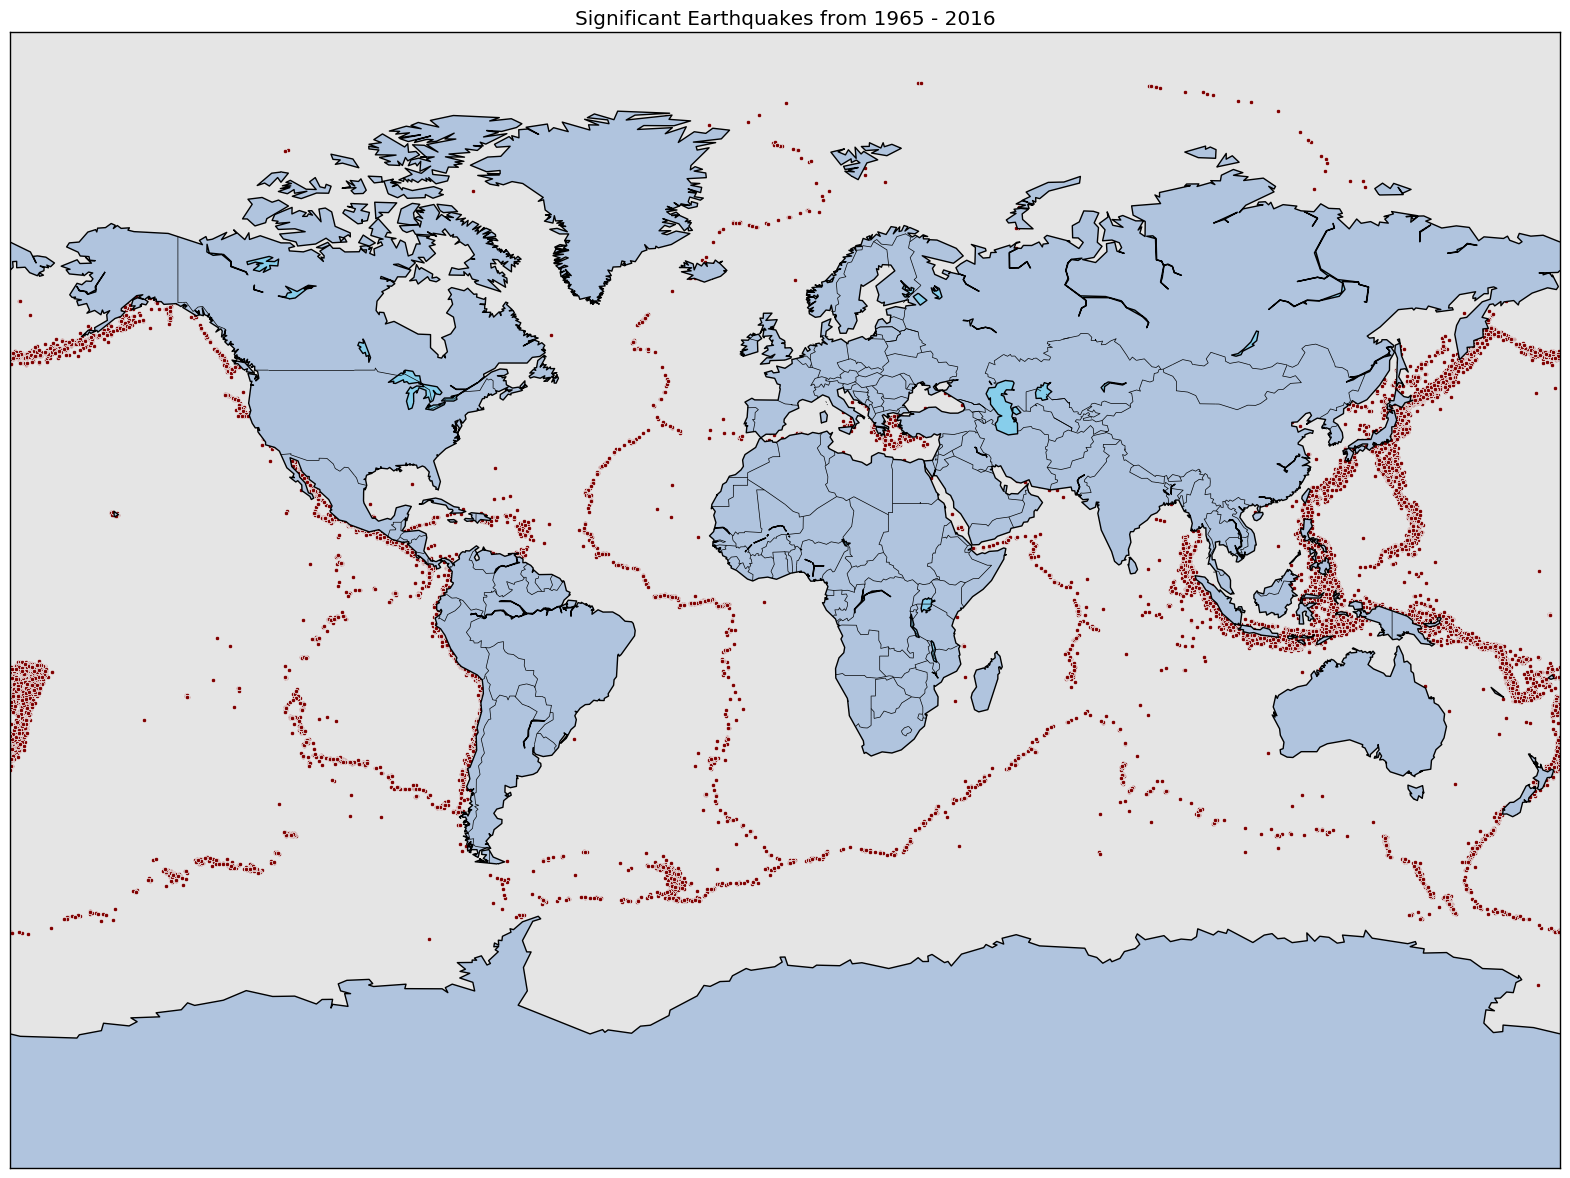

In [8]:
x,y = m([longs for longs in simple["Longitude"]],
         [lats for lats in simple["Latitude"]])
fig = plt.figure(figsize=(20,20))
plt.title("Significant Earthquakes from 1965 - 2016")
m.scatter(x,y, s = 10, c = "maroon")
m.drawcoastlines()
m.drawmapboundary()
m.drawcountries()
m.fillcontinents(color='lightsteelblue',lake_color='skyblue')

plt.show()

It seems like earthquakes are distributed around naturally occuring fault lines in the earth's tectonic plates. Let's make the dots appear a bit larger in order to figure out which regions have the most concentration.

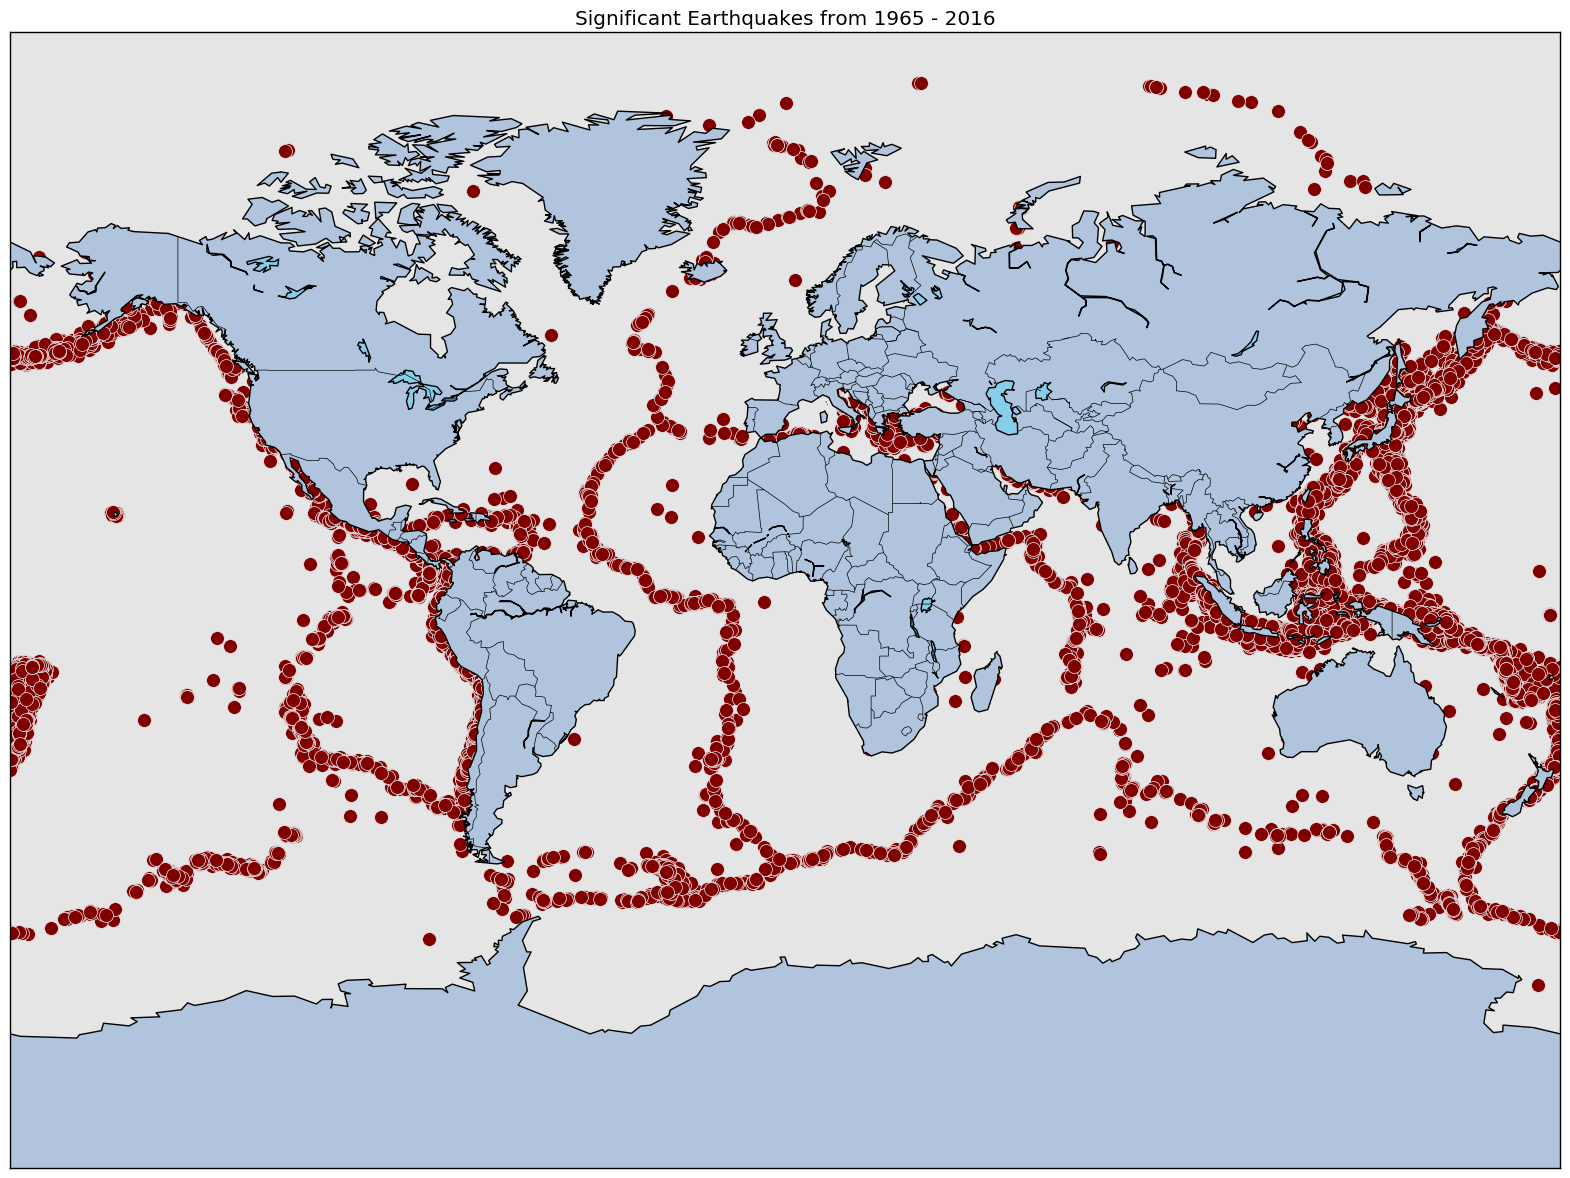

In [9]:
fig = plt.figure(figsize=(20,20))
plt.title("Significant Earthquakes from 1965 - 2016")
m.scatter(x,y, s = 100, c = "maroon")
m.drawcoastlines()
m.drawmapboundary()
m.drawcountries()
m.fillcontinents(color='lightsteelblue',lake_color='skyblue')

plt.show()

It seems that majority of earthquakes are concentrated in the Indonesian, Sino Pacific and the Japanese area. Why is this so? Before we look at magnitude of earthquakes and how it relates to the geographical distribution of significant earthqauakes, let's try to answer this question. According to National Geographic, the Pacific Ring of Fire, technically called the Circum-Pacific belt, is the world's greatest earthquake belt, according to the U.S. Geological Survey (USGS), due to its series of fault lines stretching 25,000 miles (40,000 kilometers) from Chile in the Western Hemisphere through Japan and Southeast Asia. The magazine states that 
1. Roughly 90 percent of all the world's earthquakes, and 80 percent of the world's largest earthquakes, strike along the Ring of Fire
2. About 17 percent of the world's largest earthquakes and 5-6 percent of all quakes occur along the Alpide belt.

Are these statistics true? Let's find out!

I have the defined the Ring of Fire matrix to be the area of the world whose latitude is below 59.389 and above -45.783 and whose longitude is greater than -229.219 and below -65.391 degrees, (converted to about -70 to 120 on the Mercator projection). These values are obtained by drawing a rectangle that circumscribed the Ring of Fire area on the USGS interactive map.

In [10]:
rof_lat = [-61.270, 56.632]
rof_long = [-70, 120]

In [11]:
ringoffire = simple[((simple.Latitude < rof_lat[1]) & 
                    (simple.Latitude > rof_lat[0]) & 
                     ~((simple.Longitude < rof_long[1]) & 
                       (simple.Longitude > rof_long[0])))]

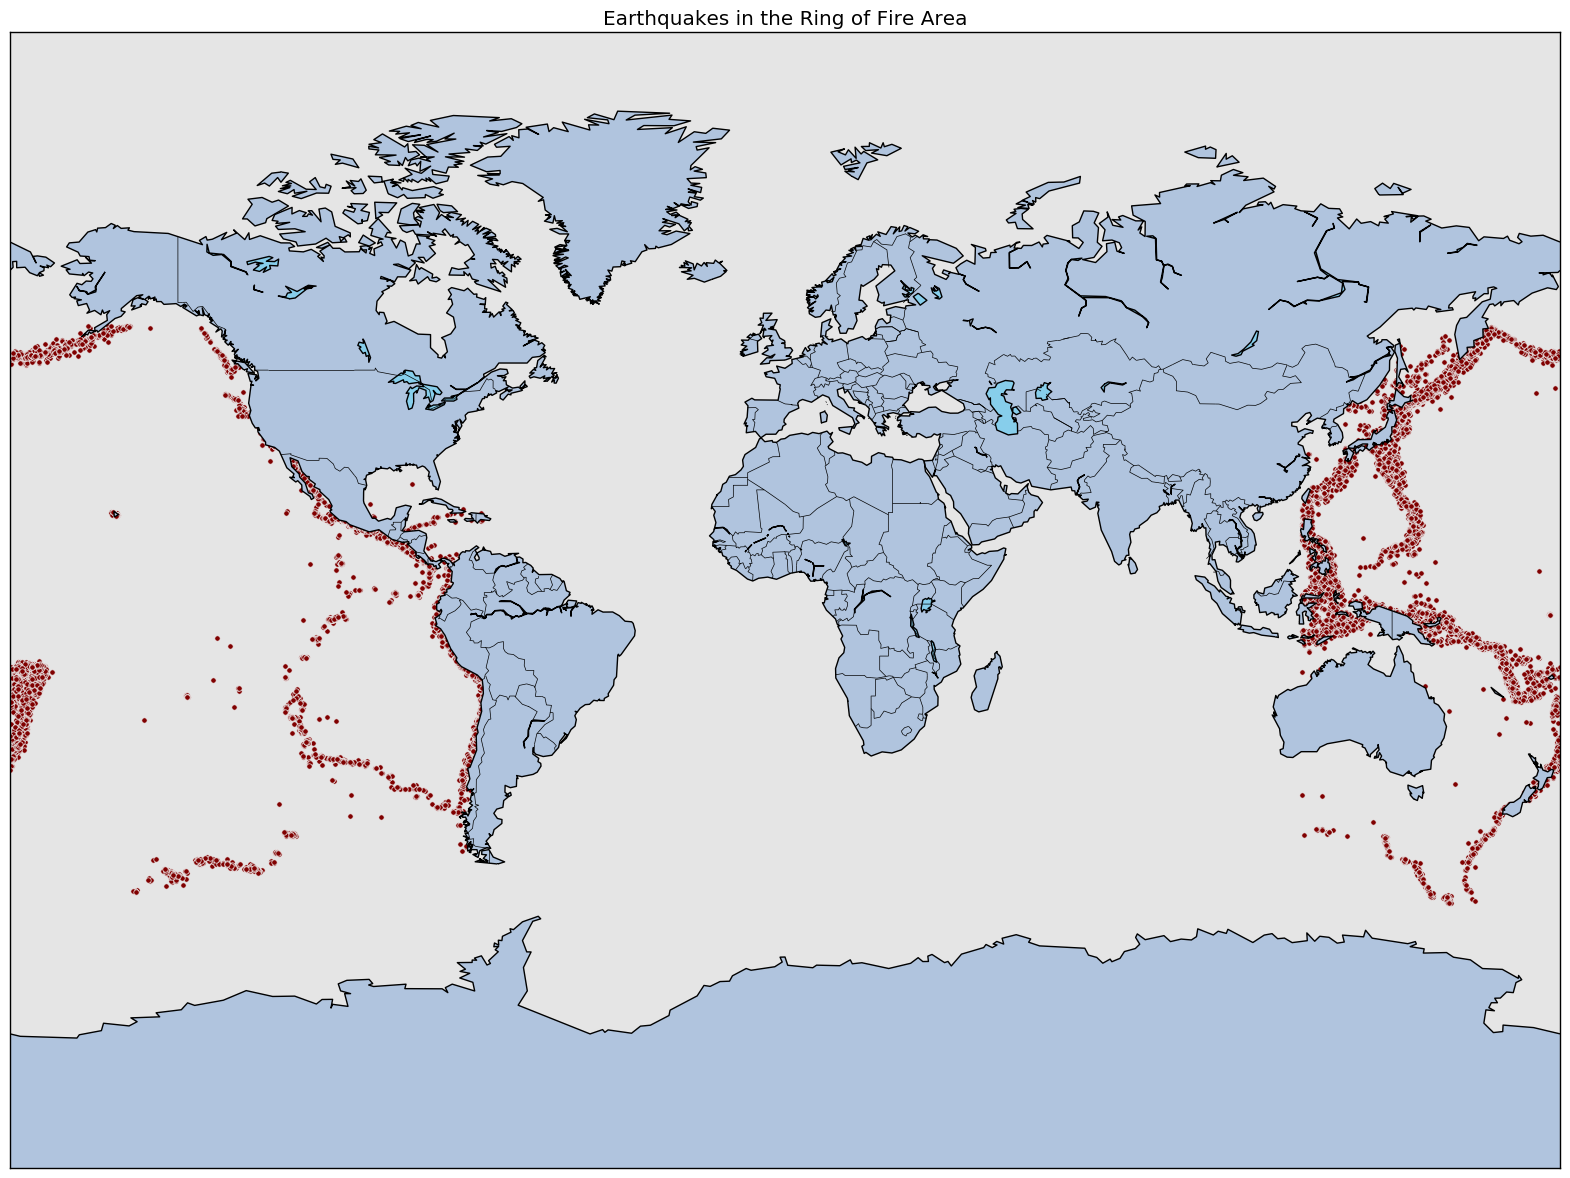

In [12]:
x,y = m([longs for longs in ringoffire["Longitude"]],
         [lats for lats in ringoffire["Latitude"]])
fig2 = plt.figure(figsize=(20,20))
plt.title("Earthquakes in the Ring of Fire Area")
m.scatter(x,y, s = 15, c = "maroon")
m.drawcoastlines()
m.drawmapboundary()
m.drawcountries()
m.fillcontinents(color='lightsteelblue',lake_color='skyblue')

plt.show()

In [13]:
ringoffire

,Date,Time,Latitude,Longitude,Magnitude,Depth
0,01/02/1965,13:44:18,19.2460,145.6160,6.0,131.60
1,01/04/1965,11:29:49,1.8630,127.3520,5.8,80.00
2,01/05/1965,18:05:58,-20.5790,-173.9720,6.2,20.00
4,01/09/1965,13:32:50,11.9380,126.4270,5.8,15.00
5,01/10/1965,13:36:32,-13.4050,166.6290,6.7,35.00
7,01/15/1965,23:17:42,-13.3090,166.2120,6.0,35.00
9,01/17/1965,10:43:17,-24.5630,178.4870,5.8,565.00
11,01/24/1965,00:11:17,-2.6080,125.9520,8.2,20.00
12,01/29/1965,09:35:30,54.6360,161.7030,5.5,55.00
13,02/01/1965,05:27:06,-18.6970,-177.8640,5.6,482.90


There are 17596 earthquakes which are positioned solely in the ring of fire area. There were 23412 total large earthquakes in the entire dataset. So, frequency wise, about 75.1% of significant or largest earthquakes are in the Ring of Fire region. This is extremely close to the 80% figure cited in the National Geographic. 

## Magnitude Statistics

### What are some basic statistics (max, min, average etc) for the magnitudes of the entire dataset and the Ring of Fire earthquake subset?
### Which magnitudes occur the most frequently in both datasets?
### Is there some sort of pattern in the frequency of magnitudes?

In [14]:
minimum = simple["Magnitude"].min()
maximum = simple["Magnitude"].max()
average = simple["Magnitude"].mean()

print("Minimum:", minimum)
print("Maximum:",maximum)
print("Mean",average)

('Minimum:', 5.5)
('Maximum:', 9.0999999999999996)
('Mean', 5.882530753460003)


In [15]:
minimum = ringoffire["Magnitude"].min()
maximum = ringoffire["Magnitude"].max()
average = ringoffire["Magnitude"].mean()

print("Minimum:", minimum)
print("Maximum:",maximum)
print("Mean",average)

('Minimum:', 5.5)
('Maximum:', 9.0999999999999996)
('Mean', 5.887151057058525)


The minimum, maximum and average for both datasets are eerily close together! What does that mean? For one thing, the subset data (the Ring of Fire earthquakes) comprise almost 75% of the total data; this ensures that statistics for both datasets will be extremely similar. Secondly, and more importantly, the dataset contains only earthquakes that have more than 5.0 magnitude (significant ones). If the dataset included a list of all earthquakes, we would see that a concentration of the world's major earthquakes would be in the Ring of Fire area. We will do so later. 

In the meantime, let's continue to look at some simple statistics and correlations with magnitude.

,Range of Magnitude,Frequency,Percentage
0,5.5-5.9,14109.0,60.2640
1,5.9-6.3,5655.0,24.1543
2,6.3-6.7,2173.0,9.2816
3,6.7-7.1,905.0,3.8655
4,7.1-7.5,347.0,1.4821
5,7.5-7.9,162.0,0.6920
6,7.9-8.3,48.0,0.2050
7,8.3-8.7,9.0,0.0384
8,8.7-9.1,2.0,0.0085
9,9.1-9.5,2.0,0.0085


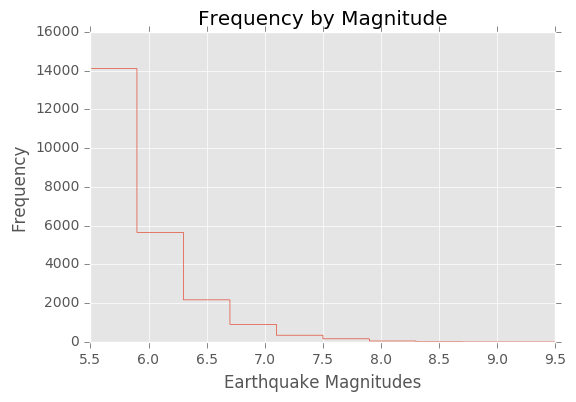

In [166]:
n, bins, patch = plt.hist(simple["Magnitude"], histtype = 'step', range=(5.5,9.5), bins = 10)
plt.xlabel("Earthquake Magnitudes")
plt.ylabel("Frequency")
plt.title("Frequency by Magnitude")
histo = pd.DataFrame()
for i in range(0, len(n)):
    mag = str(bins[i])+ "-"+str(bins[i+1])
    freq = n[i]
    percentage = round((n[i]/total) * 100, 4)
    histo = histo.append(pd.Series([mag, freq, percentage]), ignore_index=True)
    
histo.columns = ['Range of Magnitude', 'Frequency', 'Percentage']
histo

It seems that 60% of significant earthquakes had a magnitude between 5.5 to 5.86, whereas less that 4% total scored between 7.0 and 9.1 on the Richter scale. 

An interesting patterns also occurs when we plot magnitudes vs frequency on a log scale.

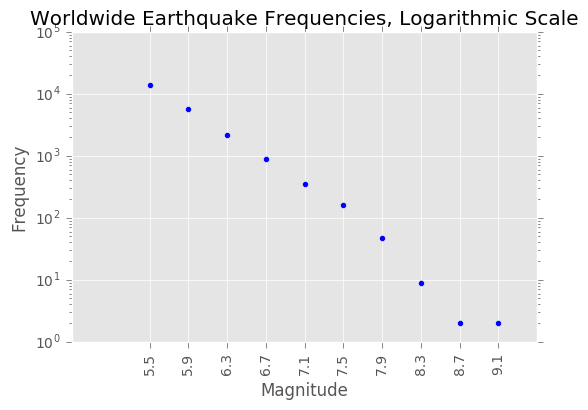

In [224]:
fig, ax = plt.subplots()
#ax.plot(histo.index, fit[0] * histo.index + fit[1], color='red')
ax.scatter(histo.index, histo['Frequency'])
plt.xticks(histo.index, bins, rotation='vertical')
plt.yscale('log', nonposy='clip')

plt.xlabel("Magnitude")
plt.ylabel("Frequency")
plt.title("Worldwide Earthquake Frequencies, Logarithmic Scale")
fig.show()

Now the earthquakes almost a straight line on the graph. This pattern is known as a power-law distribution: it turns out that for every increase of
one point in magnitude, an earthquake becomes about ten times less frequent. So, for example, magnitude 6 earthquakes occur ten times more frequently than magnitude 7's, and one hundred times more often than magnitude 8's. 

We can use this to relatively calculate the probability that an earthquake will hit a particular region, although it is impossible to know exactly when. For example, if we know that there were 15 earthquakes between 5.0 and 5.9 in a particular region in a period of 70 years, that works to about one earthquake in three years. Following this distribution above, we can "predict" that an earthquake measuring between 6.0 and 6.9 should
occur about once every thirty years in this region. 

# Is there any correlation between depth of the earthquake and magnitude of the earthquake? 

Earthquakes can occur anywhere between the Earth's surface and about 700 kilometers below the surface. For scientific purposes, an earthquake depth range of 0 - 700 km is divided into three zones: shallow, intermediate, and deep.

In [187]:
shallow = len(simple[simple.Depth < 70]) #18660
intermediate = len(simple[(simple.Depth > 70) & (simple.Depth < 300)]) ##3390
deep = len(simple[simple.Depth > 300]) #1326

print str(round(shallow/float(total) * 100, 4)) + " percent of signficant earthquakes are shallow."
print str(round(intermediate/float(total) * 100, 4)) + " percent of signficant earthquakes are intermediate."
print str(round(deep/float(total) * 100, 4)) + " percent of signficant earthquakes are deep."

79.7027 percent of signficant earthquakes are shallow.
14.4798 percent of signficant earthquakes are intermediate.
5.6638 percent of signficant earthquakes are deep.


This is very surprising! There was an assumption that deep earthquakes necessarily produce significant ones, but that is not true. 

What about the geographical distribution of deep earthquakes? I predict that deep earthquakes are primarily situated in the Ring of Fire. 

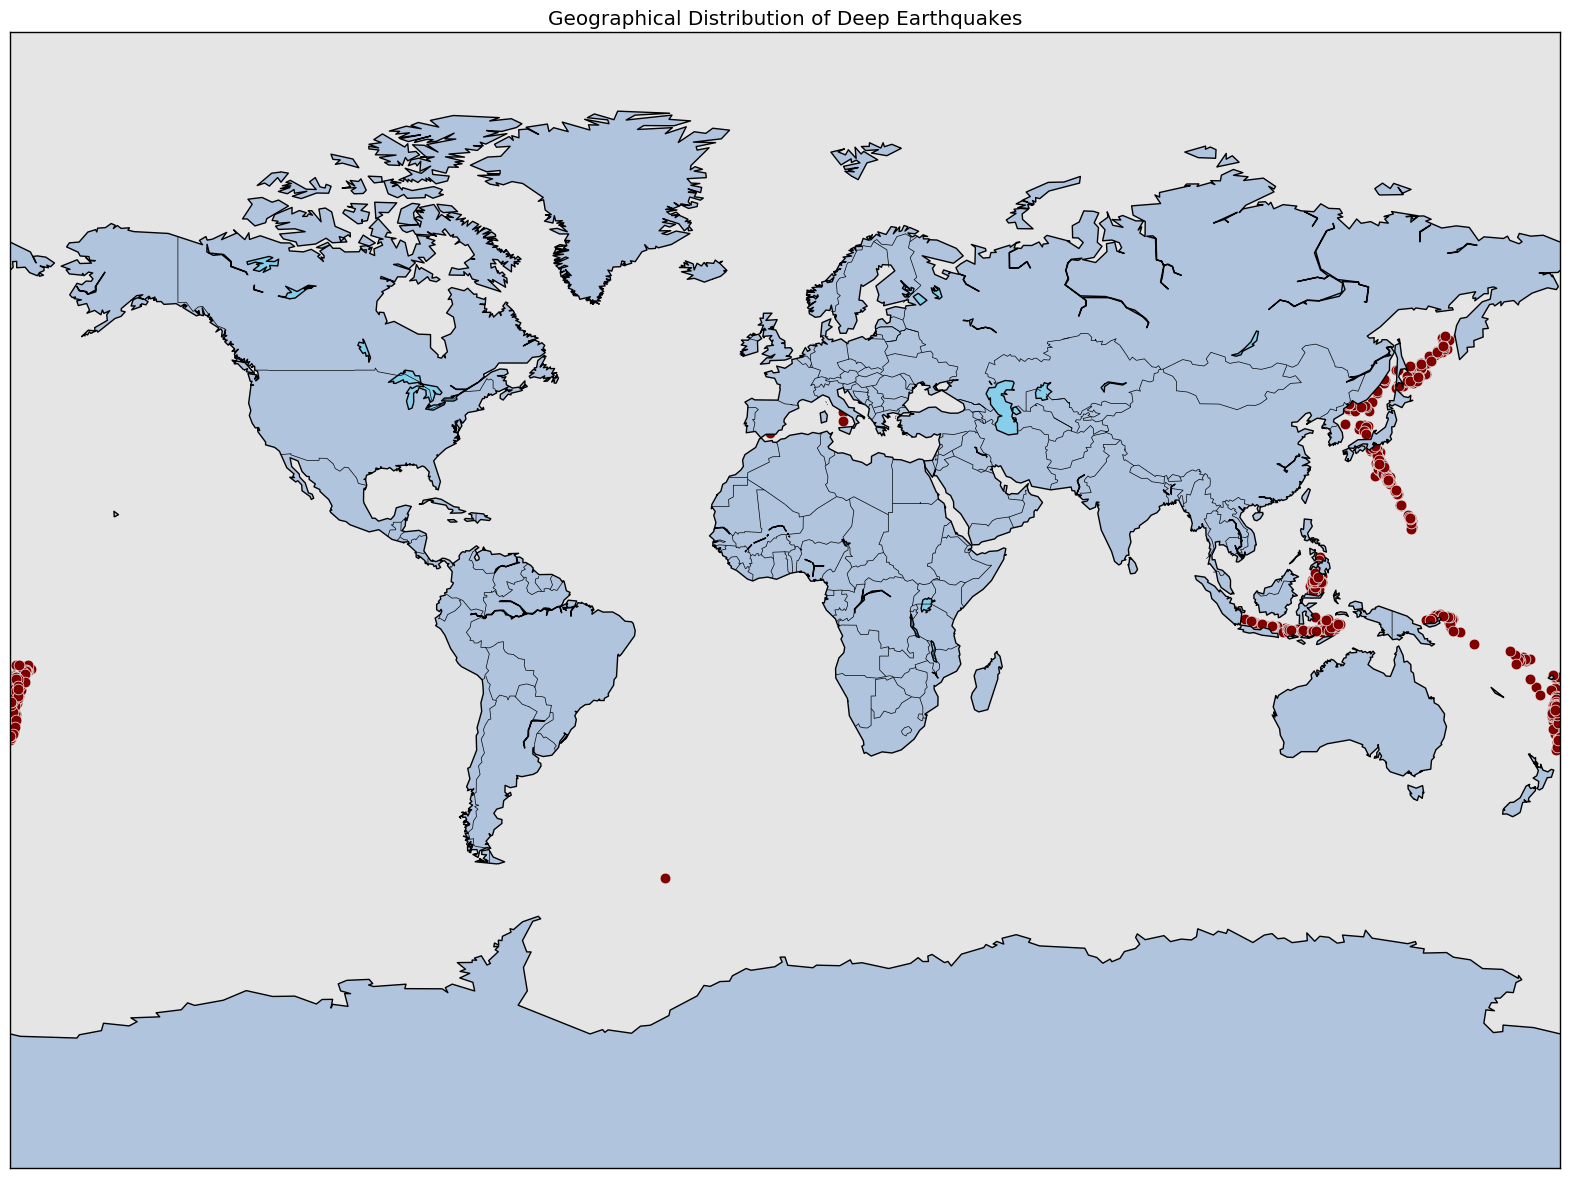

In [190]:
deep_df = simple[simple.Depth > 300]
x,y = m([longs for longs in deep_df["Longitude"]],
         [lats for lats in deep_df["Latitude"]])
fig = plt.figure(figsize=(20,20))
plt.title("Geographical Distribution of Deep Earthquakes")
m.scatter(x,y, s = 60, c = "maroon")
m.drawcoastlines()
m.drawmapboundary()
m.drawcountries()
m.fillcontinents(color='lightsteelblue',lake_color='skyblue')

plt.show()

Deep earthquakes are primarily situated in the Ring of Fire area, with the exception of a few near the Italian Penninsula.

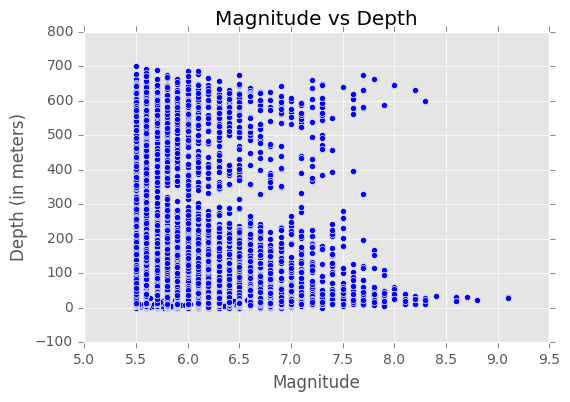

In [195]:
plt.scatter(simple["Magnitude"],simple["Depth"])
plt.xlabel("Magnitude")
plt.ylabel("Depth (in meters)")
plt.title("Magnitude vs Depth")
plt.show()

This plot tells me that earthquakes with magnitudes 5.5 to roughly 6.5 can be found in a great range of depths, from 0 meters to 700 meters. However, the depth of larger earthquakes are bimodal - they originate from the surface or from deep underground.

Are they correlated at all? Doing a simple coefficient of correlations calculation says the answer is most likely no.

In [19]:
np.corrcoef(simple["Magnitude"], simple["Depth"])

array([[ 1.        ,  0.02345731],
       [ 0.02345731,  1.        ]])

## Time correlations

### Do some earthquakes occur more in some months than others?
### Do some years have more earthquakes than others?

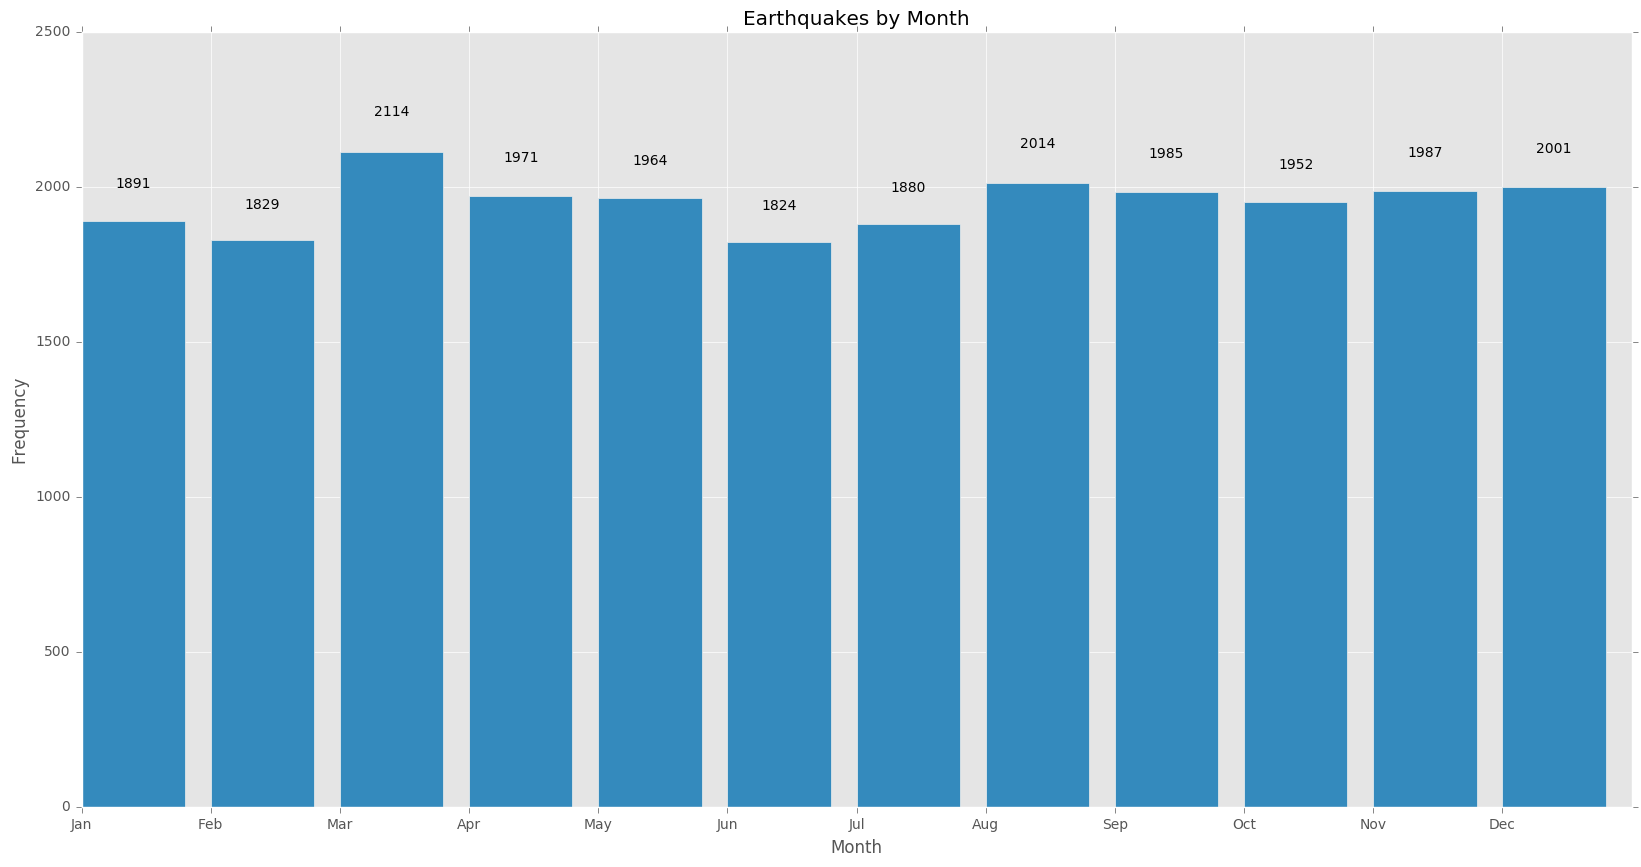

In [245]:
simple["Date"] = pd.to_datetime(simple["Date"])
simple["Month"] = simple['Date'].dt.month
simple["Year"] = simple['Date'].dt.year

freqbymonth = simple.groupby('Month').size()
freqbyyear = simple.groupby('Year').size()

fig, ax = plt.subplots(figsize = (20,10))
bar_positions = np.arange(12) + 0.5
months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

k = plt.bar(np.arange(len(months)), freqbymonth)
plt.xticks(np.arange(len(months)), months)

plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Earthquakes by Month')
 

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')
        
autolabel(k)
plt.show()

It seems that there is a uniform distribution of earthquake frequency along all 12 months.

Let's look at year.

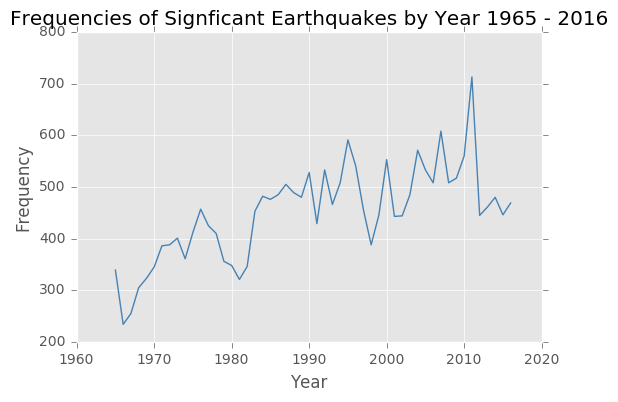

In [256]:
yearly_line = plt.plot([i for i in range(1965, 2017)], freqbyyear, color = 'steelblue')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Frequencies of Signficant Earthquakes by Year 1965 - 2016')